In [33]:
import numpy as np 
import csv 
import pandas as pd 
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator 
from pgmpy.inference import VariableElimination 


In [34]:
#read Cleveland Heart Disease data 
condition = pd.read_csv(r'heart.csv')
condition = condition.replace('?',np.nan)

In [35]:
print('Few examples from the dataset are given below') 
condition.head()

Few examples from the dataset are given below


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [41]:
condition.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [92]:
condition.shape

(1025, 14)

In [43]:
condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

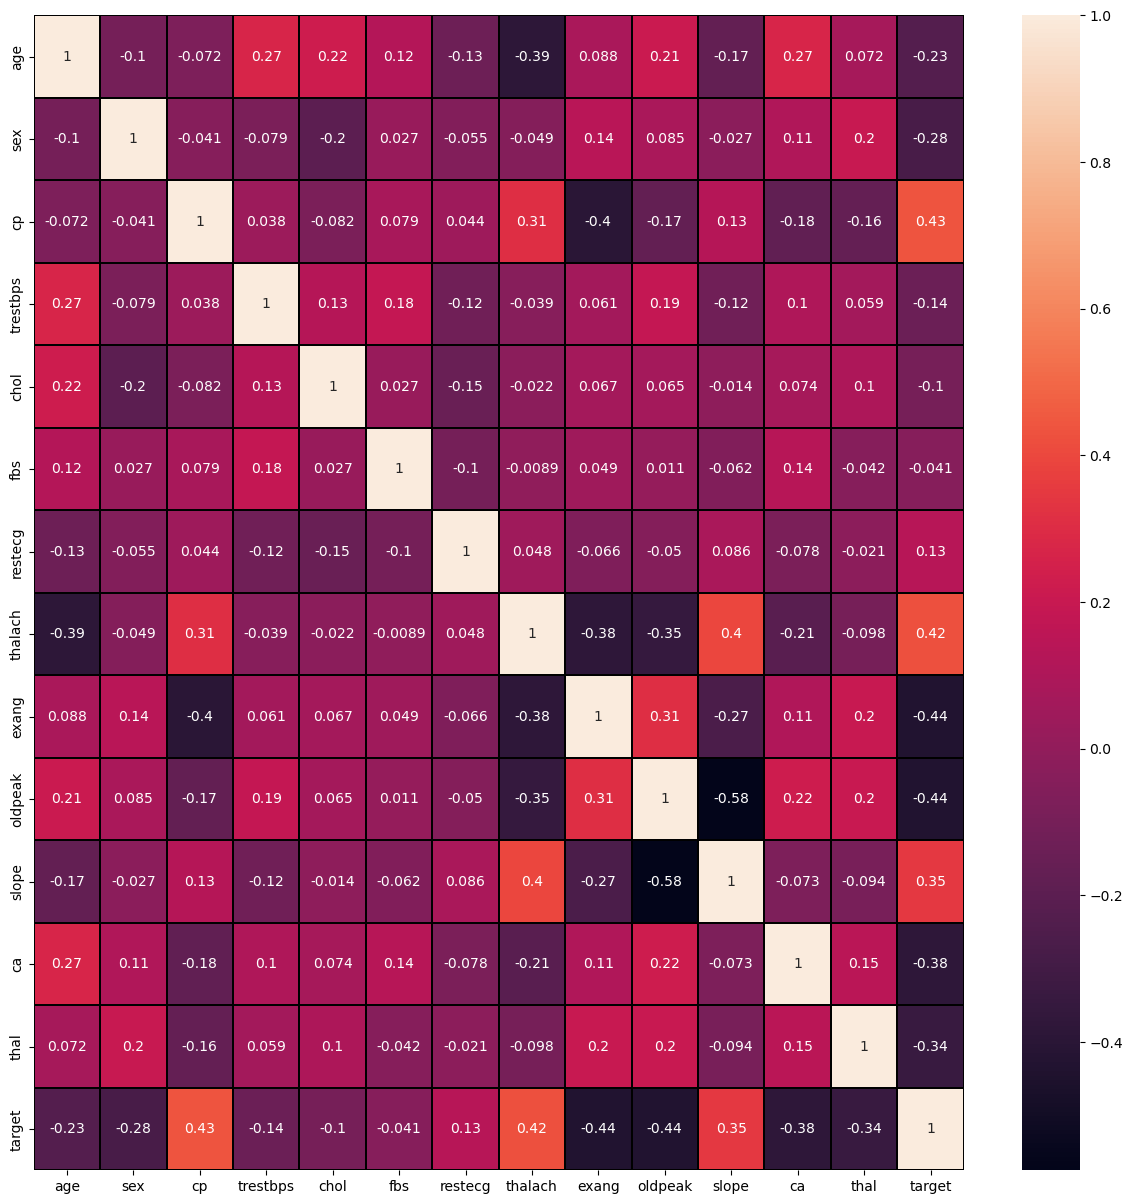

In [48]:
comatrix = condition.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(comatrix,annot = True,linecolor ='black', linewidths = .3)

<AxesSubplot:ylabel='Frequency'>

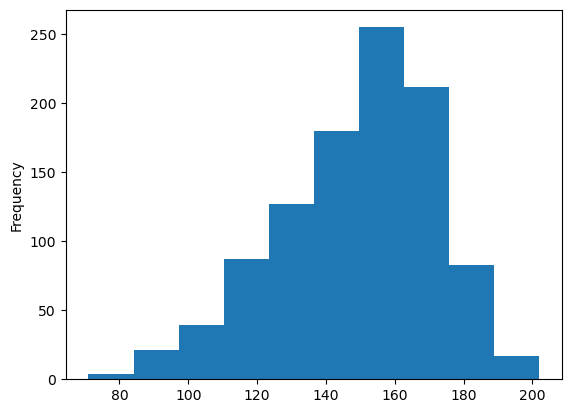

In [50]:
condition.thalach.plot.hist()

In [53]:
sds = condition.loc[(condition['thalach']>=140) & (condition['thalach']<=180)]
sds.target.value_counts()

1    400
0    266
Name: target, dtype: int64

In [54]:
sds2 = condition.loc[(condition['thalach']<140) | (condition['thalach']>180)]
sds2.target.value_counts()

0    233
1    126
Name: target, dtype: int64

<AxesSubplot:xlabel='sex'>

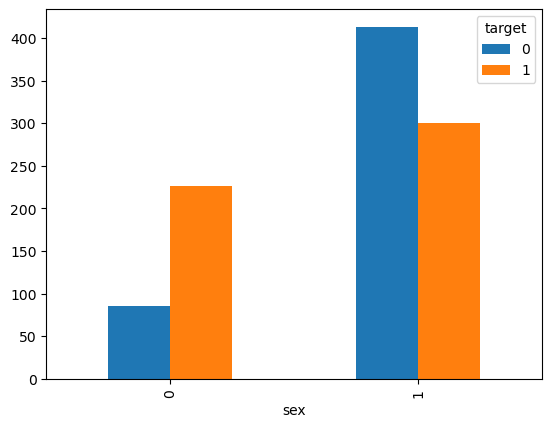

In [55]:
pd.crosstab(condition.sex,condition.target).plot(kind = 'bar')

<AxesSubplot:xlabel='exang'>

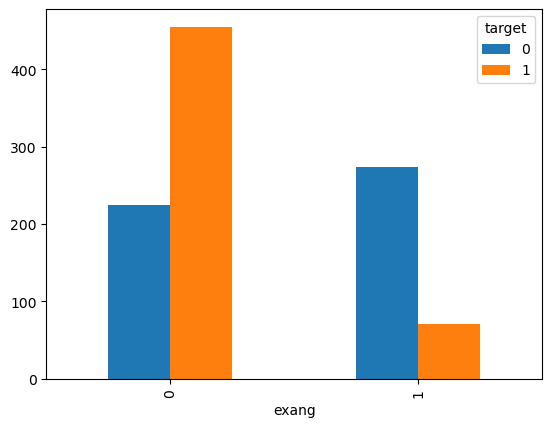

In [58]:
pd.crosstab(condition.exang,condition.target).plot(kind = 'bar')

In [59]:
#Model Bayesian Network  
model=BayesianNetwork([('age','trestbps'),('age','fbs'), ('sex','trestbps'),('exang','trestbps'),('trestbps','target'),('fbs','target'),('target','restecg'), ('target','thalach'),('target','chol')]) 

In [60]:
#Learning CPDs using Maximum Likelihood Estimators
print('\n Learning CPD using Maximum likelihood estimators') 
model.fit(condition,estimator=MaximumLikelihoodEstimator)


 Learning CPD using Maximum likelihood estimators


In [61]:
# Inferencing with Bayesian Network 
print('\n Inferencing with Bayesian Network:') 
heart_infer = VariableElimination(model) 


 Inferencing with Bayesian Network:


In [70]:
#computing the Probability of HeartDisease given Age
print('\n 1. Probability of HeartDisease given Age=30') 
q=heart_infer.query(variables=['target'],evidence ={'age':70}) 
print(q)


 1. Probability of HeartDisease given Age=30
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4227 |
+-----------+---------------+
| target(1) |        0.5773 |
+-----------+---------------+


In [75]:
#computing the Probability of HeartDisease given cholesterol 
#print('\n 2. Probability of HeartDisease given cholesterol=100') 
q=heart_infer.query(variables=['target'],evidence ={'sex':0}) 
print(q) 

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4523 |
+-----------+---------------+
| target(1) |        0.5477 |
+-----------+---------------+


In [78]:
q=heart_infer.query(variables=['target'],evidence ={'exang':1}) 
print(q)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5133 |
+-----------+---------------+
| target(1) |        0.4867 |
+-----------+---------------+


In [80]:

q=heart_infer.query(variables=['target'],evidence ={'thalach':160}) 
print(q)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5070 |
+-----------+---------------+
| target(1) |        0.4930 |
+-----------+---------------+


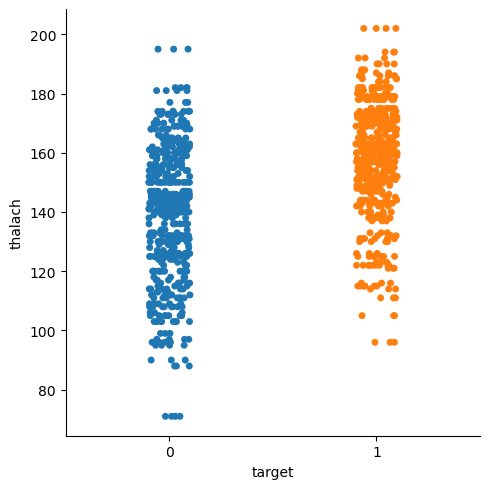

In [81]:
sns.catplot(data=condition, x="target", y="thalach")

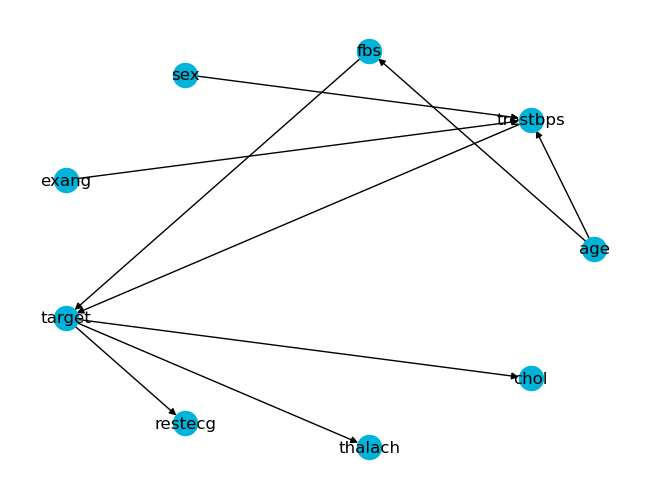

In [91]:
import networkx as nx
import pylab as plt
pos = nx.circular_layout(model)
nx.draw(model , node_color = '#00b4d9' , pos=pos,with_labels= True)
plt.savefig('labels.png')
plt.show()